In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # For mac users with Retina display
from matplotlib import pyplot as plt
import numpy as np
import pygtc
import emcee
import corner
from emcee.autocorr import AutocorrError, integrated_time

## make the plots not suck
plt.rcParams['lines.linewidth']   =3
plt.rcParams['axes.linewidth']    = 2
plt.rcParams['xtick.major.width'] =2
plt.rcParams['ytick.major.width'] =2
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['legend.numpoints'] = 1
plt.rcParams['axes.labelweight']='semibold'
plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['font.weight'] = 'semibold'
plt.rcParams['axes.titleweight']='semibold'
plt.rcParams['axes.titlesize']=9



In [17]:
filename = 'Lowres_backend2.h5'#'Lowres_backend2.h5'
reader = emcee.backends.HDFBackend(filename)
burnin = 10000
thin = 5


In [18]:
tau = reader.get_autocorr_time(tol=0)
print(tau)
converged = np.all(tau * 50 < reader.iteration)
print(converged)
print(reader.iteration, np.round(tau*50))



[2498.29353594 3582.12516183 1665.88448107  571.21959277  507.76114443
  500.2569875   538.68117719  502.06522783  473.25577384  471.88466507
  516.64315503  458.22109845  439.81541641]
True
300000 [124915. 179106.  83294.  28561.  25388.  25013.  26934.  25103.  23663.
  23594.  25832.  22911.  21991.]


(13,)


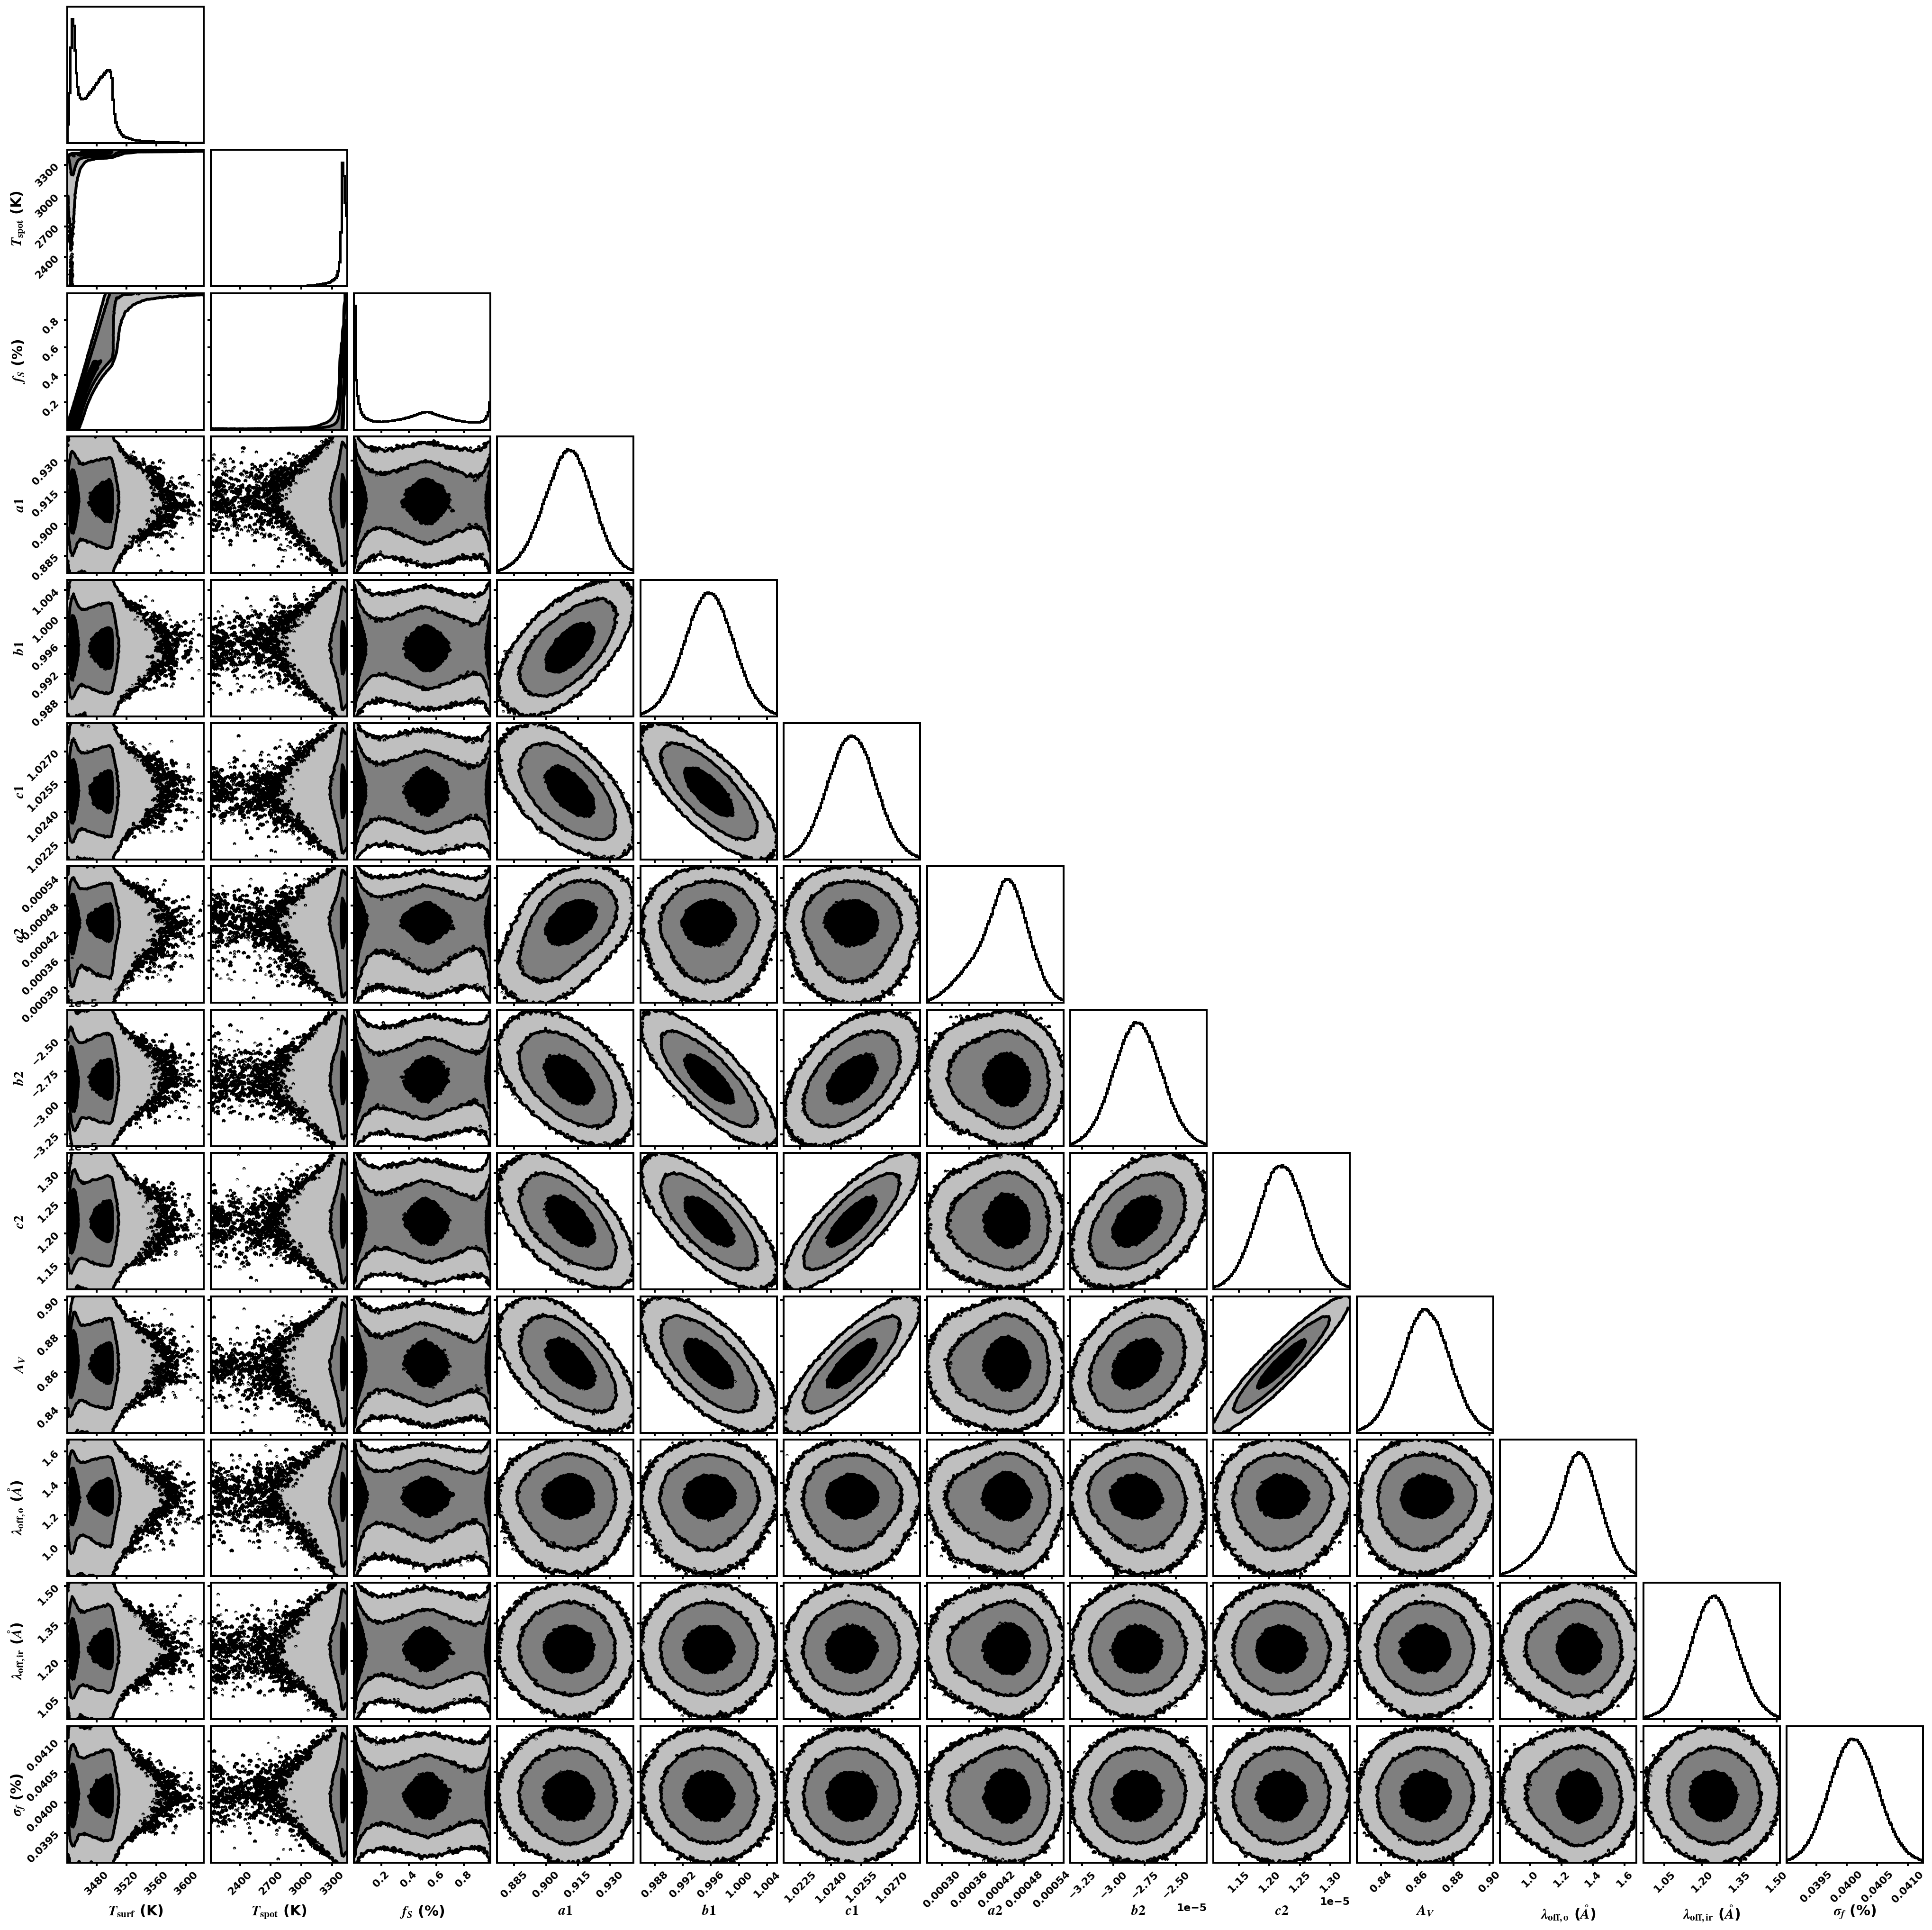

In [19]:
labels = [r'$T_{\rm{surf}}$ (K)',r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)',r'$a1$',r'$b1$',r'$c1$',r'$a2$',r'$b2$',r'$c2$','$A_V$',r'$\lambda_{\rm{off,o}}$ ($\AA$)',r'$\lambda_{\rm{off,ir}}$ ($\AA$)',r'$\sigma_f$ (%)']
print(np.shape(labels))
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)
rng = [0.995] * samples.shape[1]

######
samples[:,9]-=0.2
#samples[:,0]+=75.
#samples[:,1]+=75.
# print(np.shape(samples))
# fs = np.array(samples[:,2])
# old = np.array(samples[:,1])
# offset = np.array((0.003*np.array(samples[:,1])/(fs**0.4)))
# samples[:,1] = np.array(samples[:,1])-offset
# loc = np.squeeze(np.where(samples[:,1]<1500))
# samples[loc,1] = old[loc]
# new = np.array(samples[:,1])
####

#fig = corner.corner( 
#    samples, 
#    fill_contours=True, labels=labels,range=rng, plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
#    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
#);
#plt.show()


fig = corner.corner( 
    samples, bins=100,
    fill_contours=True, range=rng,labels=labels, plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);
plt.show()

In [20]:
from IPython.display import display, Math
ndim = np.size(labels)
for i in range(ndim):
    mcmc = np.percentile(samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [21]:
print(np.median(samples[:,[6,7,8]],axis=0))
print(np.std(samples[:,[6,7,8]],axis=0))

#5e-05
#8e-06
#2.5e-06

[ 4.36248762e-04 -2.80827414e-05  1.21964497e-05]
[5.48374658e-05 1.92609301e-06 3.97906296e-07]


In [22]:
samples_trim1 = np.array(samples[:,[0,1,2,9]])
samples_trim1[:,2]=100.*np.array(samples_trim1[:,2])
print(np.shape(samples_trim1))



(5800000, 4)


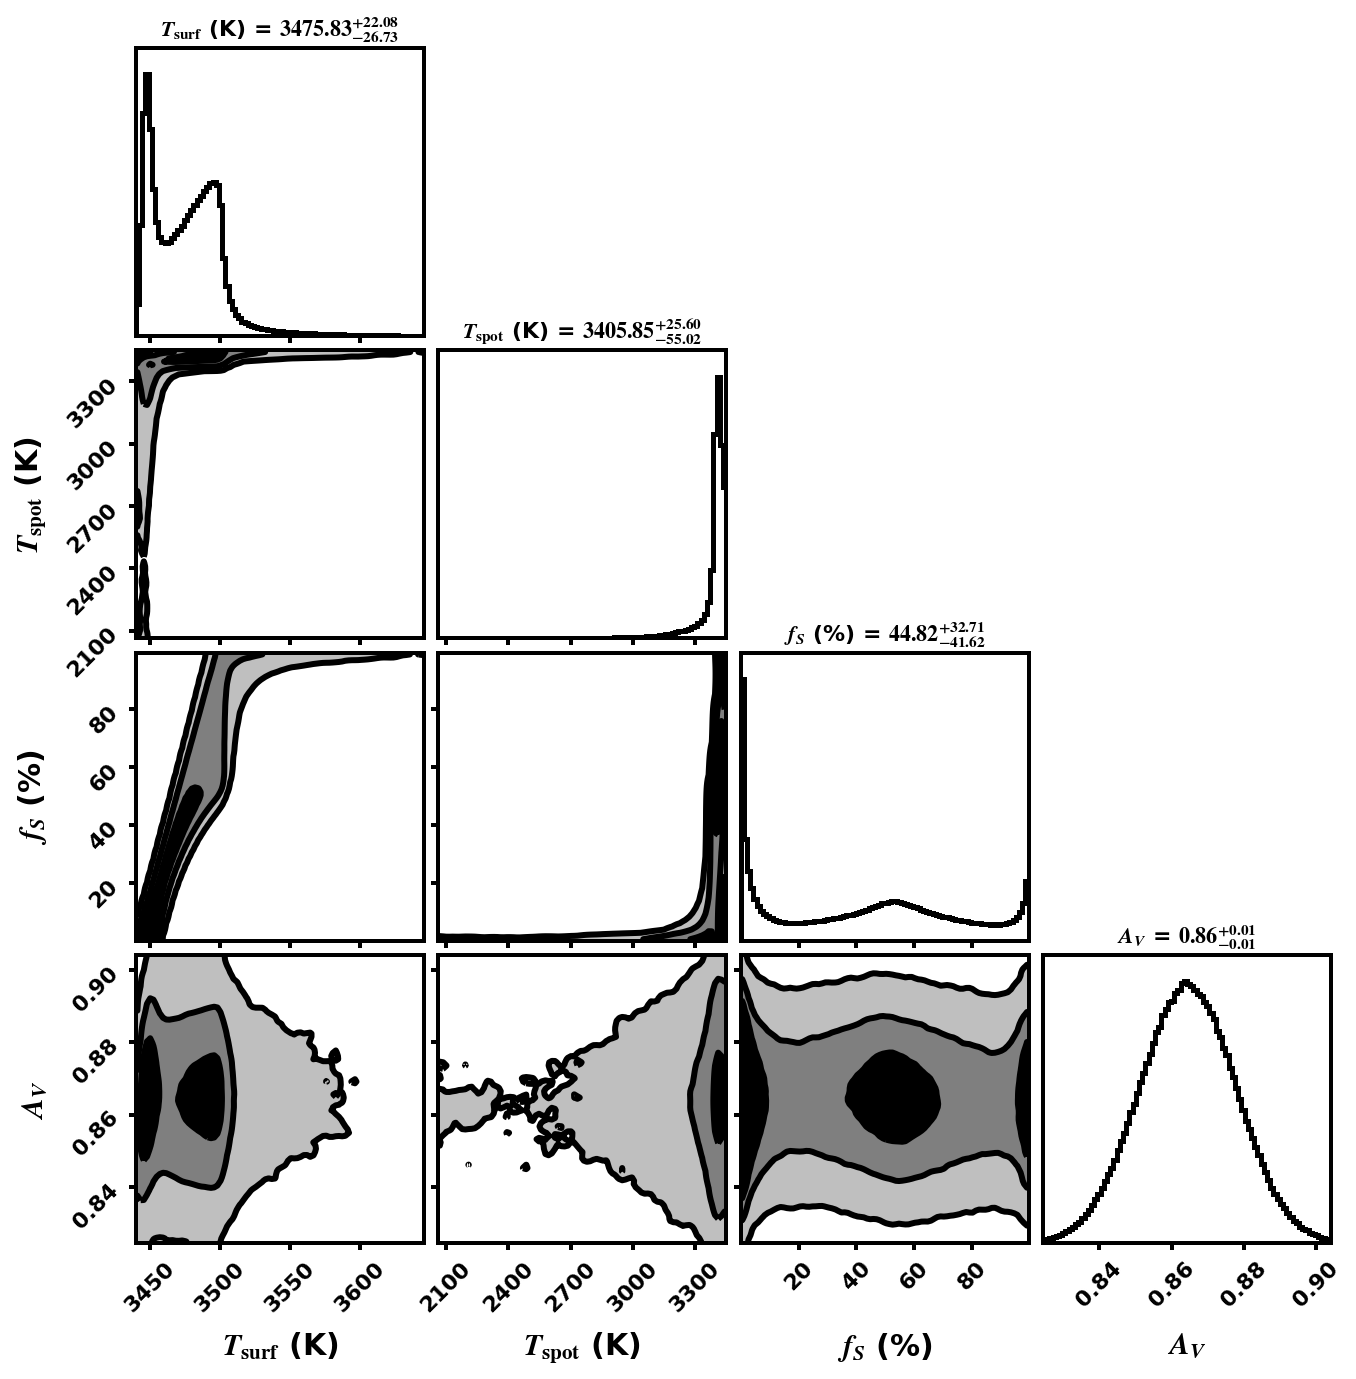

In [23]:
rng = [0.997] * samples_trim1.shape[1]
limits = [[3420,3600],[2800,3480],[0,99],[0.0,2]]
labels = [r'$T_{\rm{surf}}$ (K)',r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)',r'$A_V$']
fig = corner.corner( 
    samples_trim1, bins=90,smooth=1,
    fill_contours=True, show_titles=True,title_fmt='.2f', range=rng,labels=labels, plot_datapoints=False,title_kwargs={"fontsize": 11},
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);

plt.savefig('lowres_mini_contour1.pdf')

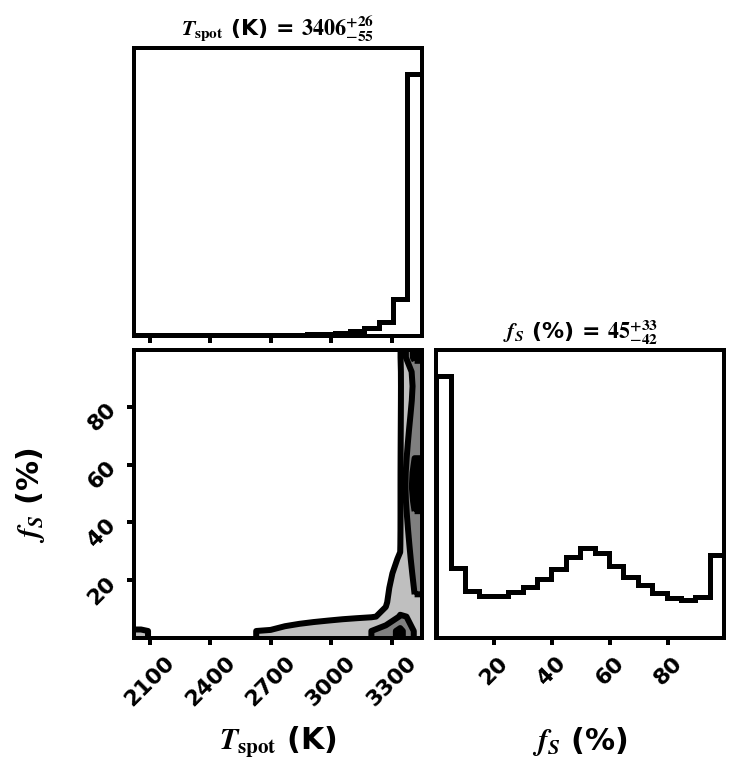

In [24]:
samples_trim1 = samples[:,1:3]
samples_trim1[:,1]=100*np.array(samples_trim1[:,1])
rng = [0.999] * samples_trim1.shape[1]

labels = [r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)']
fig = corner.corner( 
    samples_trim1, 
    fill_contours=True, range=rng,show_titles=True, title_fmt='.0f',labels=labels,plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);
plt.savefig('lowres_mini_contour2.pdf')

(960000, 3)


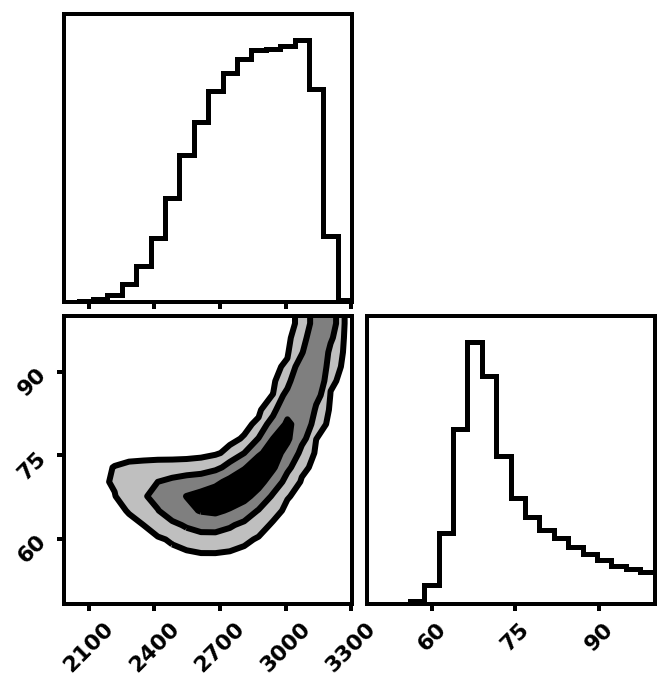

In [25]:
filename = 'Transspec2.h5'
reader = emcee.backends.HDFBackend(filename)
burnin = 10000
thin = 2
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)
samples[:,0]=100*np.array(samples[:,0])
print(np.shape(samples))
samples_trim2 = samples[:,0:2]
tmp1 = np.array(samples_trim2[:,0])
tmp2 = np.array(samples_trim2[:,1])
samples_trim2[:,0] = np.array(tmp2)
samples_trim2[:,1] = np.array(tmp1)

fig = corner.corner( 
    samples_trim2, 
    fill_contours=True, plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);


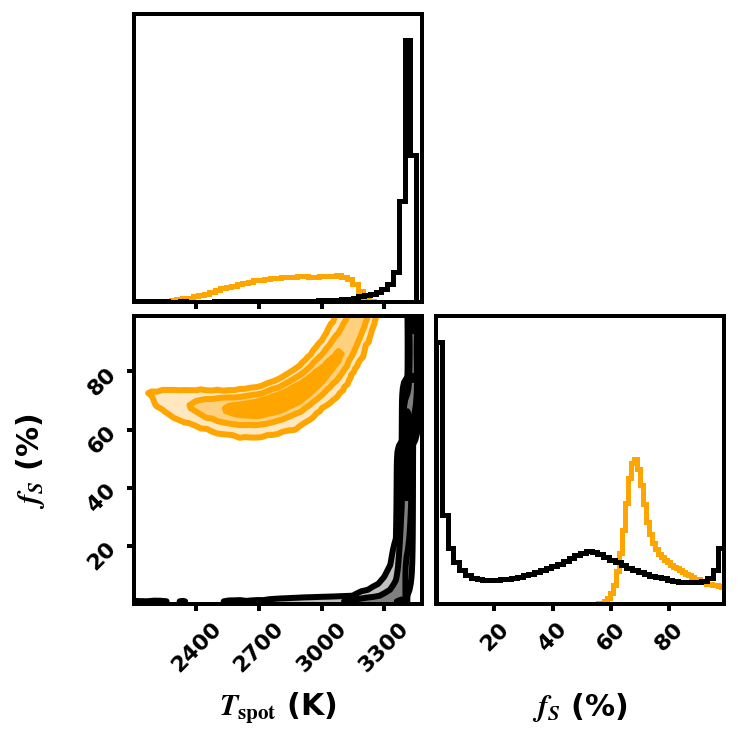

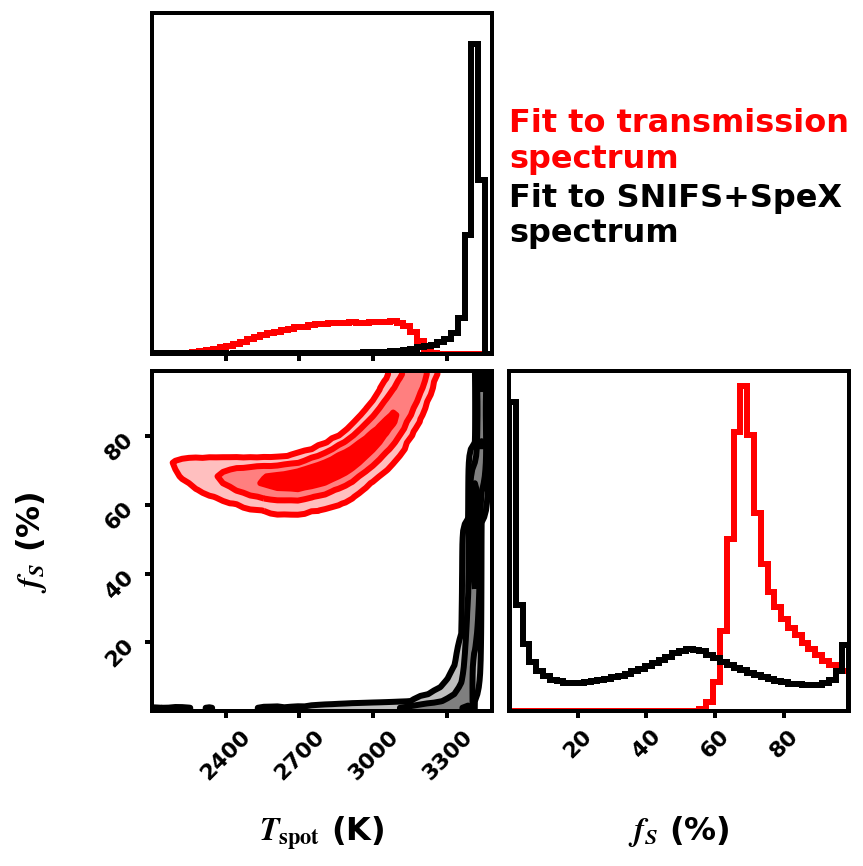

In [26]:
labels = [r'$T_{\rm{spot}} (K)',r'$f_S$ (%)']
limits = [[2100,3480],[0,99]]
weights = np.ones(len(samples_trim1))*len(samples_trim2)/len(samples_trim1)
levels = [(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
#print(levels)

fig = corner.corner(samples_trim2,fill_contours=True, plot_datapoints=False,bins=50,
                    color='orange',hist_kwargs={"linewidth": 2.5},
                    levels=levels,title_kwargs={"fontsize": 11}
                        )
labels = [r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)']
corner.corner( 
    samples_trim1, fig=fig,range=limits,bins=50,
    fill_contours=True, labels=labels,plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},weights=weights,levels=levels
);

plt.show()


fig1 = corner.corner(samples_trim2,labels=labels, hist_kwargs={"linewidth": 3},bins=50,
                    range=limits, color='red', plot_datapoints=False, 
                    fill_contours=True, levels=levels, 
                    label_kwargs={"fontsize": 16});
fig2 = corner.corner(samples_trim1, weights=weights, fig=fig1,bins=50, 
              labels=labels, range=limits,hist_kwargs={"linewidth": 3},#, color='grey'
              plot_datapoints=False, fill_contours=True, 
              levels=levels,  label_kwargs={"fontsize": 16});

args = {"fontsize": 16}
plt.text(0,2.3e5,'Fit to transmission\nspectrum',horizontalalignment='left',
         verticalalignment='center',color='red',
         **args)
plt.text(0,2e5,'Fit to SNIFS+SpeX\nspectrum',horizontalalignment='left',
         verticalalignment='center',#,color='grey',
         **args)
fig2.set_size_inches(6.5, 6.5)

plt.savefig('dual_constraint1.pdf')

#corner.corner(samples_trim1, fig=fig, weights=np.ones(len(samples_trim1))*len(samples_trim2)/len(samples_trim1),fill_contours=True, plot_datapoints=False)

(5800000, 2) (960000, 2)
['$T_{\\rm{spot}}$ (K)', '$f_S$ (%)']


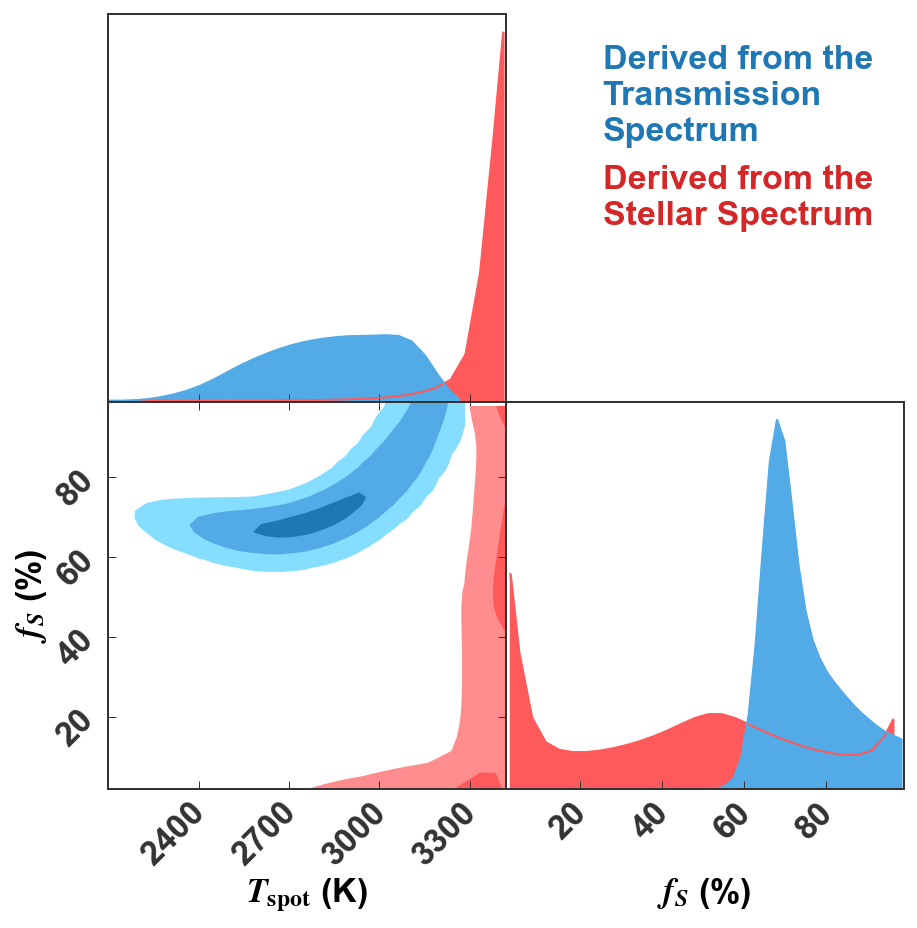

In [27]:
print(np.shape(samples_trim1),np.shape(samples_trim2))
print(labels)

labels = [r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)']
GTC = pygtc.plotGTC(chains=[samples_trim2,samples_trim1],holdRC=True,
                    sigmaContourLevels=True,
                    nContourLevels=3,
                    colorsOrder=['blues', 'reds', 'purples', 'browns', 'pinks'],
                    figureSize='APJ_page',
                    chainLabels=['Derived from the\nTransmission\nSpectrum','Derived from the\nStellar Spectrum'],
                    mathTextFontSet=None,
                    paramRanges=[[2100,3420],[2,99]],
                    paramNames=labels,
                    customLabelFont={"size":17},
                    customLegendFont={"size":17},
                    customTickFont={"size":17}
                    #,contour_kwargs={"fontsize": 16}
                   )


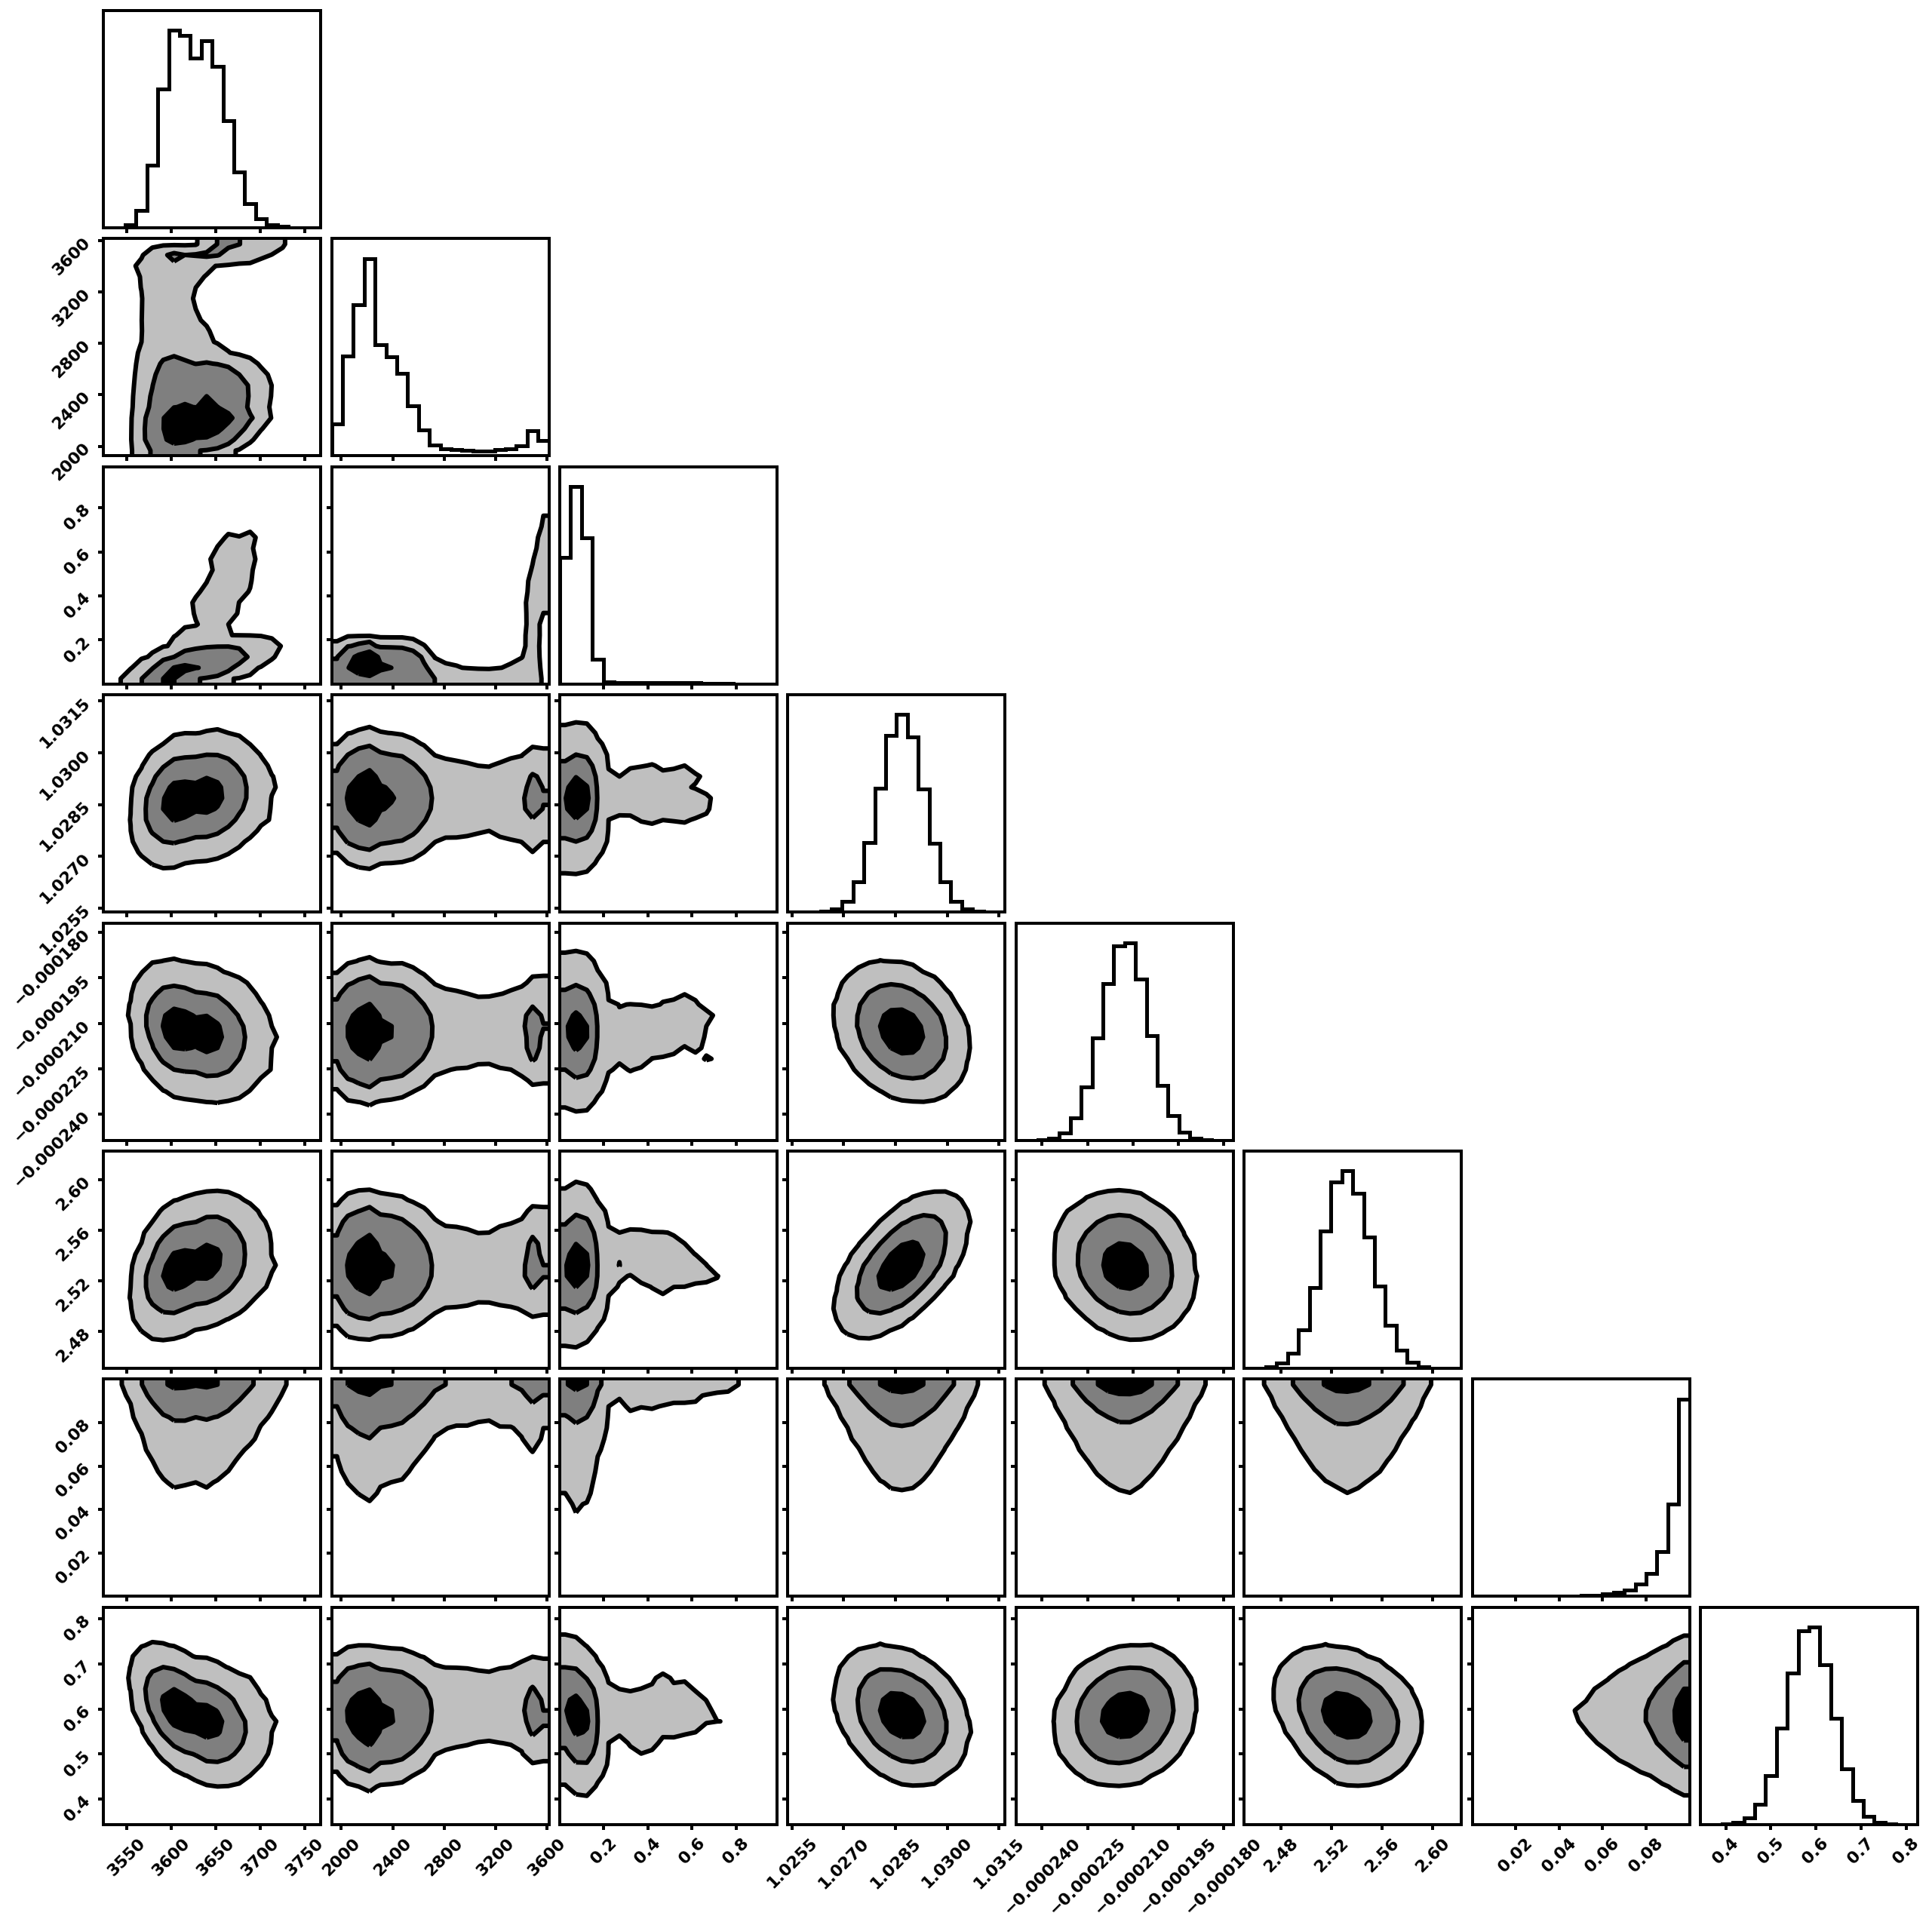

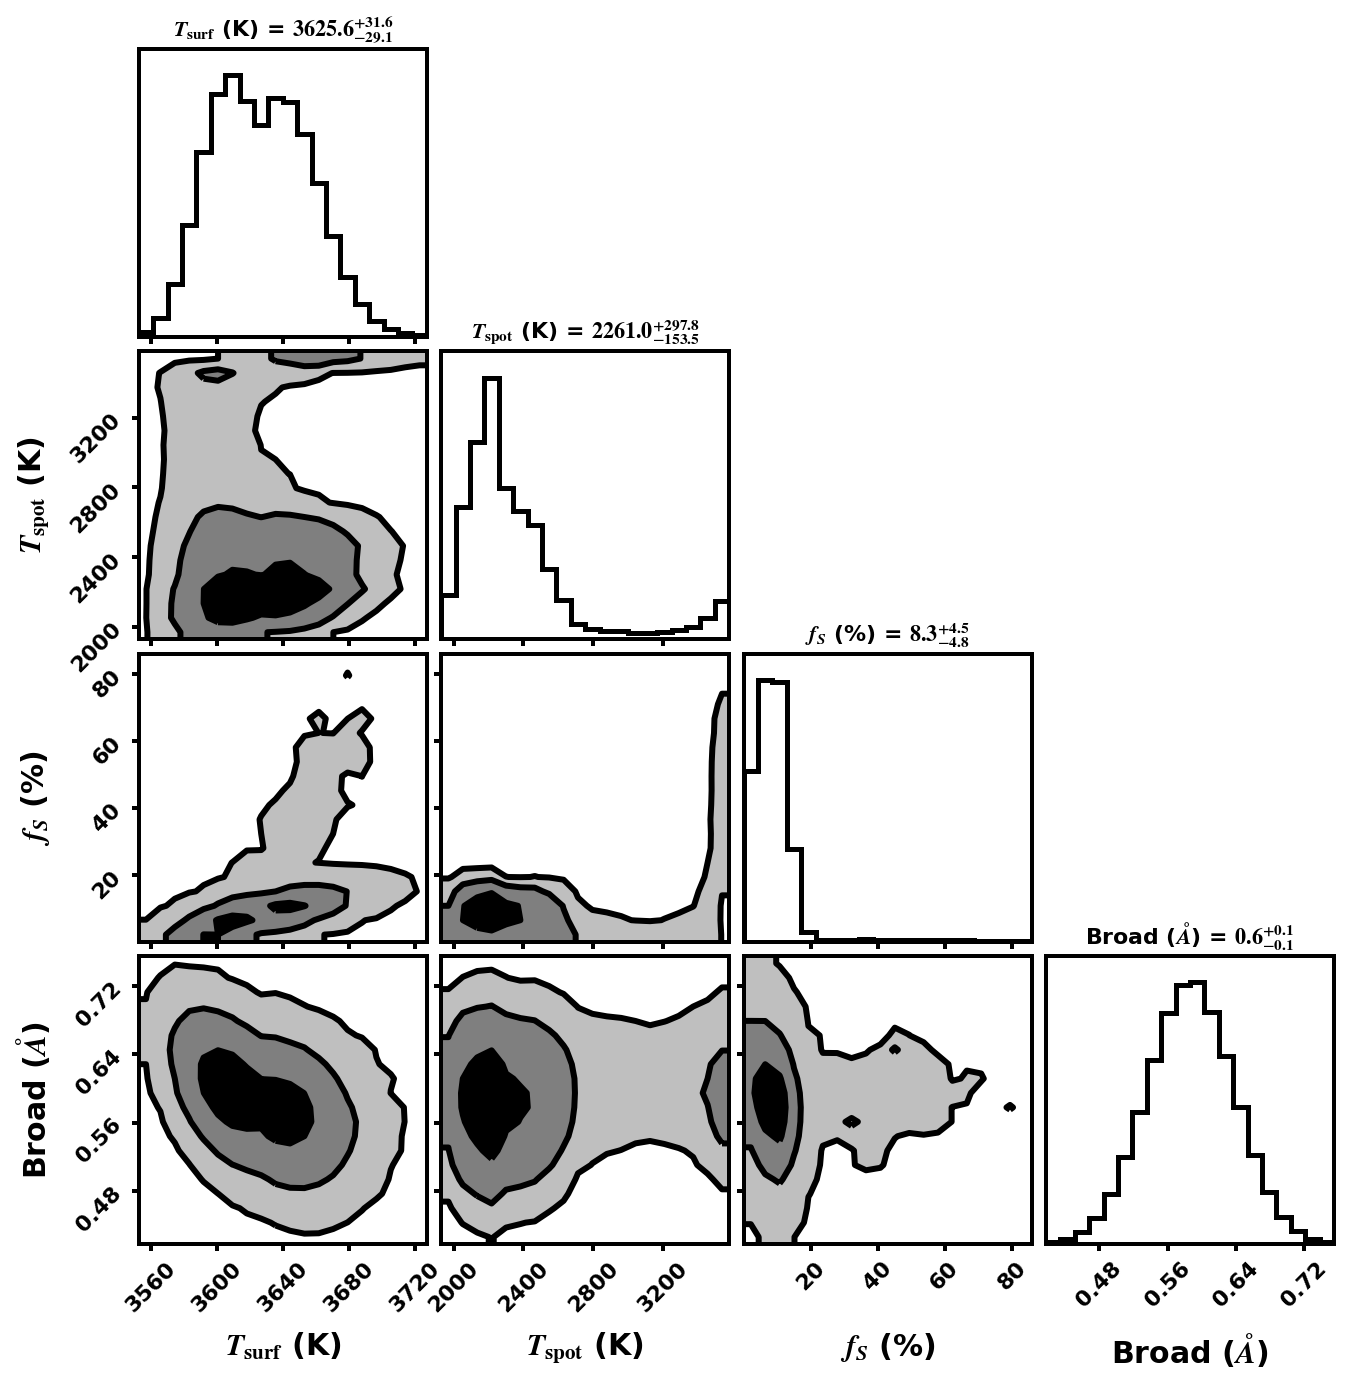

In [41]:
filename = 'IGRINS_backend_K_11.h5'#'Lowres_backend2.h5'
reader = emcee.backends.HDFBackend(filename)
burnin = 10000
thin = 5
samples = reader.get_chain(discard=burnin, flat=True, thin=thin)
samples[:,0]-=75.
samples[:,1]-=75.

fig = corner.corner( 
    samples, 
    fill_contours=True, plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);
plt.show()

samples_trim1 = np.array(samples[:,[0,1,2,7]])
samples_trim1[:,2] = 100*np.array(samples_trim1[:,2])
rng = [0.999] * samples_trim1.shape[1]

labels = [r'$T_{\rm{surf}}$ (K)',r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)',r'Broad ($\AA$)']
fig = corner.corner( 
    samples_trim1, 
    fill_contours=True, range=rng,show_titles=True, title_fmt='.1f',labels=labels,plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},levels=[(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
);
plt.savefig('hires_mini_contour2.pdf')


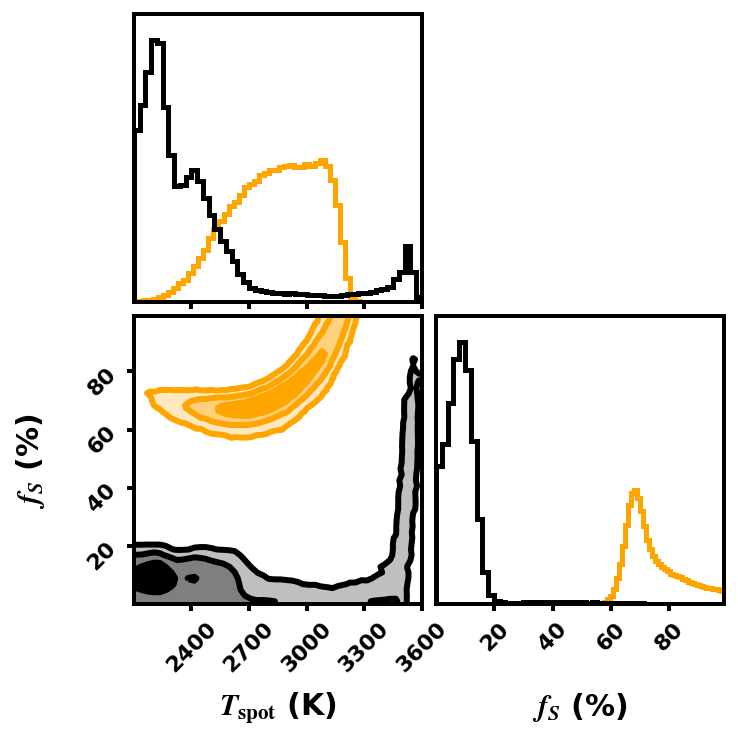

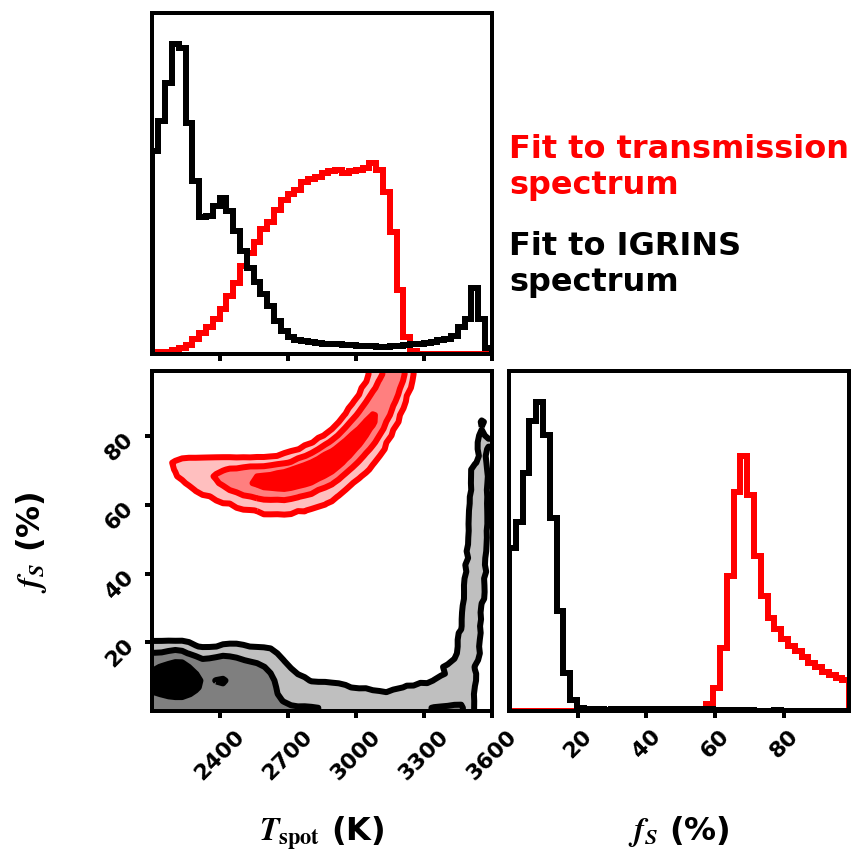

In [46]:
samples_trim1 = np.array(samples[:,1:3])
samples_trim1[:,1]*=100
rng = [0.999] * samples_trim1.shape[1]
labels = [r'$T_{\rm{spot}} (K)',r'$f_S$ (%)']
limits = [[2100,3600],[0,99]]
weights = np.ones(len(samples_trim1))*len(samples_trim2)/len(samples_trim1)
levels = [(1-np.exp(-0.5)),(1-np.exp(-2)),(1-np.exp(-4.5))]
#print(levels)

fig = corner.corner(samples_trim2,fill_contours=True, plot_datapoints=False,
                    color='orange',hist_kwargs={"linewidth": 2.5},bins=50,
                    levels=levels,title_kwargs={"fontsize": 11},
                        )
labels = [r'$T_{\rm{spot}}$ (K)',r'$f_S$ (%)']
corner.corner( 
    samples_trim1, fig=fig,range=limits,bins=50,
    fill_contours=True, labels=labels,plot_datapoints=False,title_kwargs={"fontsize": 11},#title_fmt='.3f',
    hist_kwargs={"linewidth": 2.5},weights=weights,levels=levels
);

plt.show()


fig1 = corner.corner(samples_trim2,labels=labels, hist_kwargs={"linewidth": 3},
                    range=limits, color='red', plot_datapoints=False, 
                    fill_contours=True, bins=50,  levels=levels, 
                    label_kwargs={"fontsize": 16});
fig2 = corner.corner(samples_trim1, weights=weights, fig=fig1, 
              labels=labels, range=limits,hist_kwargs={"linewidth": 3},#color='grey',
              plot_datapoints=False, fill_contours=True, bins=50, 
              levels=levels,  label_kwargs={"fontsize": 16});

args = {"fontsize": 16}
plt.text(0,2.8e5,'Fit to transmission\nspectrum',horizontalalignment='left',
         verticalalignment='center',color='red',
         **args)
plt.text(0,2.3e5,'Fit to IGRINS\nspectrum',horizontalalignment='left',
         verticalalignment='center',#color='grey',
         **args)
fig2.set_size_inches(6.5, 6.5)

plt.savefig('dual_constraint2.pdf')

#corner.corner(samples_trim1, fig=fig, weights=np.ones(len(samples_trim1))*len(samples_trim2)/len(samples_trim1),fill_contours=True, plot_datapoints=False)

